# Exercício PA3-3

Exercício com data de entrega para 25 de novembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
#from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

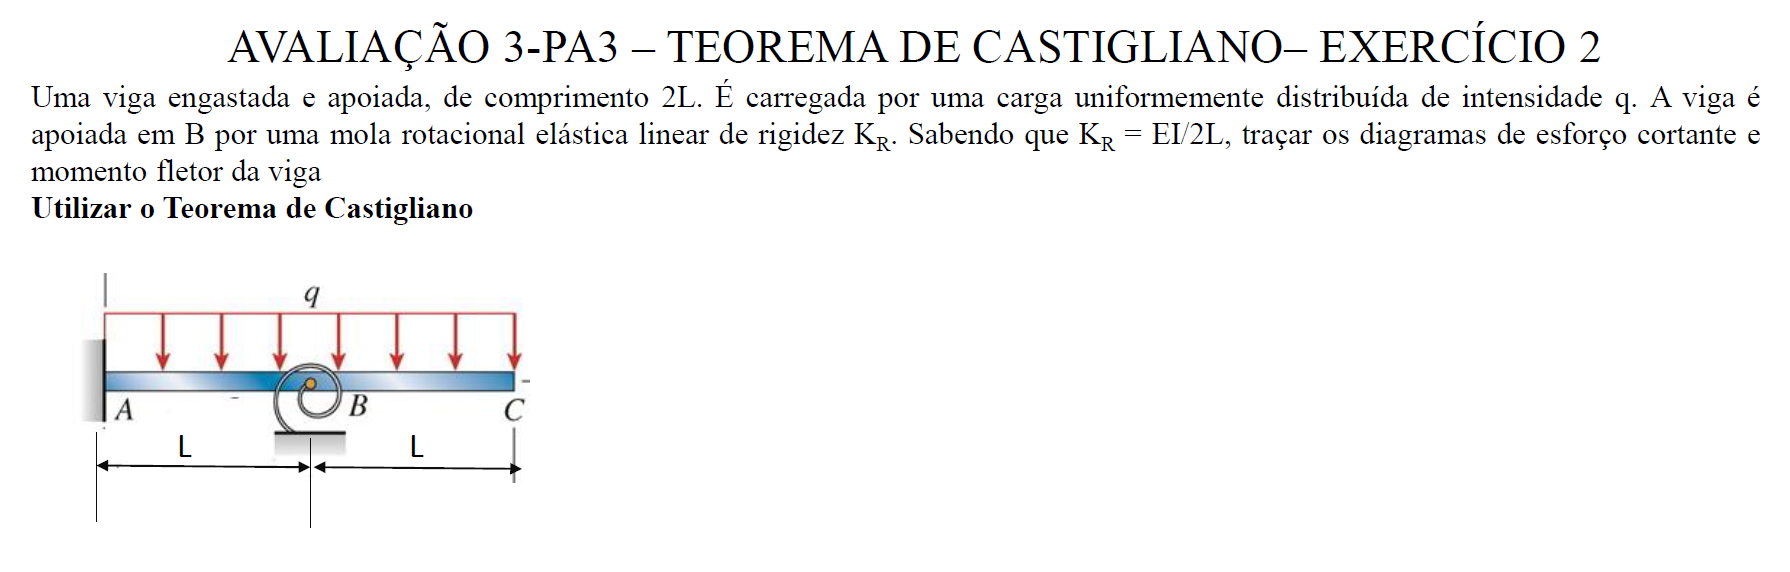

In [2]:
Image("Figuras/PA3-3.png")

# Introdução

Temos, para cada tipo de esforço, as seguintes equações de energia (para consulta).

## Esforço Normal

\begin{equation*}
    U_{N} = \int_{0}^{L}{\frac{N}{2EA}}\mathrm{d}x =
    \frac{N^{2}L}{2EA}
\end{equation*}

## Esforço Cortante

\begin{equation*}
    U_{V} = \int_{0}^{L}{\frac{V^{2}x^{2}}{2EI}}\mathrm{d}x =
    \frac{V^{2}L^{3}}{6EI}
\end{equation*}

## Momento Fletor

\begin{equation*}
    U_{M} = \int_{0}^{L}{\frac{M^{2}}{2EI}}\mathrm{d}x =
    \frac{M^{2}L}{2EI}
\end{equation*}

## Momento Torsor

\begin{equation*}
    U_{T} = \int_{0}^{L}{\frac{T^{2}}{2GJ}}\mathrm{d}x =
    \frac{T^{2}L}{2GJ}
\end{equation*}

# Solução Pelo Teorema de Castigliano

## Variáveis Globais

In [3]:
EI,L,b,q,k,kN,m = sp.symbols('EI,L,b,q,k,kN,m', positive=True)

## Equações de Energia

Equação de Energia:

\begin{equation*}
    U = \int_{0}^{L}{\frac{M^{2}\left(Q,x\right)}{2EI}}\mathrm{d}x
\end{equation*}

Deformação

\begin{equation*}
    \frac{\partial U}{\partial Q} = \int_{0}^{L}{\frac{M\left(Q,x\right)}{EI}\frac{\partial M\left(Q,x\right)}{\partial Q}}\mathrm{d}x
\end{equation*}

Onde $Q$ é uma força transversal à viga na direção da deformação procurada.

In [4]:
x,Q,l = sp.symbols('x,Q,l')
M = sp.symbols('M',cls=sp.Function)
U_M = sp.Integral((M(Q,x)**2)/(2*EI), (x,0,l))
display(U_M,sp.diff(U_M,Q))

l            
⌠            
⎮  2         
⎮ M (Q, x)   
⎮ ──────── dx
⎮   2⋅EI     
⌡            
0            

l                       
⌠                       
⎮         ∂             
⎮ M(Q, x)⋅──(M(Q, x))   
⎮         ∂Q            
⎮ ─────────────────── dx
⎮          EI           
⌡                       
0                       

Das equações de equilíbrio, temos:

\begin{equation*}
    V_{A}(\uparrow) = 2qL
\end{equation*}

\begin{equation*}
    M_{A}(\circlearrowleft) = 2qL^{2} - M_{B}(\circlearrowleft)
\end{equation*}

Sabemos ainda que, no ponto $B$, temos a seguinte condição de contorno:

\begin{equation*}
    M_{B}(\circlearrowleft) = - K_{R}\theta_{B} = - \frac{EI}{2L}\theta_{B}
\end{equation*}

In [5]:
K,L,M_B = sp.symbols("K,L,M_B",positive=True)
K_R = EI/(2*L)
V_A = 2*q*L
M_A = 2*q*L**2 - M_B
display(V_A,M_A)

2⋅L⋅q

   2        
2⋅L ⋅q - M_B

A energia total $U$ na viga é a soma das energias nos segmentos $AB$, $BC$ e na mola $B$.

## Energia em $AB$

\begin{equation*}
    M\left(x\right) = - M_{A} - \frac{qx^{2}}{2}
\end{equation*}

\begin{equation*}
    U_{AB} = \int_{0}^{L}{\frac{M^{2}}{2EI}}\mathrm{d}x =
    \int_{0}^{L}{\frac{\left(- M_{A} - \frac{qx^{2}}{2}\right)^{2}}{2EI}}\mathrm{d}x =
    \int_{0}^{L}{\frac{\left[- \left(2qL^{2} - M_{B}\right) - \frac{qx^{2}}{2}\right]^{2}}{2EI}}\mathrm{d}x
\end{equation*}

In [6]:
U_AB = U_M.replace(M(Q,x),-M_A-q*(x**2)/2).subs(l,L)
display(U_AB)

L                            
⌠                            
⎮                        2   
⎮ ⎛                    2⎞    
⎮ ⎜     2           q⋅x ⎟    
⎮ ⎜- 2⋅L ⋅q + M_B - ────⎟    
⎮ ⎝                  2  ⎠    
⎮ ──────────────────────── dx
⎮           2⋅EI             
⌡                            
0                            

## Energia da Mola $B$

\begin{equation*}
    U_B = \frac{M_{B}^{2}}{K_R} = \frac{2LM_{B}^{2}}{EI}
\end{equation*}

In [7]:
U_B = (M_B**2)/K
display(U_B)

   2
M_B 
────
 K  

## Energia em $BC$

Da direita para a esquerda, temos:

\begin{equation*}
    M\left(x\right) = - \frac{qx^{2}}{2}
\end{equation*}

\begin{equation*}
    U_{BC} = \int_{0}^{L}{\frac{M^{2}}{2EI}}\mathrm{d}x =
    \int_{0}^{L}{\frac{\left(- \frac{qx^{2}}{2}\right)^{2}}{2EI}}\mathrm{d}x
\end{equation*}

In [8]:
U_BC = U_M.replace(M(Q,x),-q*(x**2)/2).subs(l,L)
display(U_BC)

L         
⌠         
⎮  2  4   
⎮ q ⋅x    
⎮ ───── dx
⎮  8⋅EI   
⌡         
0         

## Energia total

\begin{equation*}
    U = U_{AB} + U_{B} + U_{BC} =
    \int_{0}^{L}{\frac{\left[- \left(2qL^{2} - M_{B}\right) - \frac{qx^{2}}{2}\right]^{2}}{2EI}}\mathrm{d}x +
    \frac{M_{B}^{2}}{K_{R}} +
    \int_{0}^{L}{\frac{\left(- \frac{qx^{2}}{2}\right)^{2}}{2EI}}\mathrm{d}x
\end{equation*}

In [9]:
U = U_AB + U_B + U_BC
display(U)

L                                                
⌠                                                
⎮                        2                       
⎮ ⎛                    2⎞       L                
⎮ ⎜     2           q⋅x ⎟       ⌠                
⎮ ⎜- 2⋅L ⋅q + M_B - ────⎟       ⎮  2  4         2
⎮ ⎝                  2  ⎠       ⎮ q ⋅x       M_B 
⎮ ──────────────────────── dx + ⎮ ───── dx + ────
⎮           2⋅EI                ⎮  8⋅EI       K  
⌡                               ⌡                
0                               0                

Assim, temos a seguinte rotação $\theta_{B}$:

\begin{equation*}
    \theta_{B} = \frac{\partial U}{\partial M_{B}} = - \frac{M_{B}}{K_R}
\end{equation*}

In [10]:
display(U.diff(M_B))
eq = sp.Eq(U.diff(M_B).doit().subs(K,K_R), -M_B/K_R).simplify()
display(eq)

L                                   
⌠                                   
⎮      2                2           
⎮ - 4⋅L ⋅q + 2⋅M_B - q⋅x       2⋅M_B
⎮ ─────────────────────── dx + ─────
⎮           2⋅EI                 K  
⌡                                   
0                                   

             ⎛      2           ⎞ 
2⋅L⋅M_B   -L⋅⎝- 13⋅L ⋅q + 30⋅M_B⎠ 
─────── = ────────────────────────
   EI               6⋅EI          

Resolvendo a equação acima para $M_{B}$, temos:

In [11]:
M_calc = sp.solve(eq,M_B)[0]
display(M_calc,M_A,M_A.subs(M_B,M_calc))

    2  
13⋅L ⋅q
───────
   42  

   2        
2⋅L ⋅q - M_B

    2  
71⋅L ⋅q
───────
   42  

Ou seja:

\begin{equation*}
    V_{A}(\uparrow) = 2qL
\end{equation*}

\begin{equation*}
    M_{A}(\circlearrowleft) = \frac{71}{42}qL^{2}
\end{equation*}

\begin{equation*}
    M_{B}(\circlearrowleft) = \frac{13}{42}qL^{2}
\end{equation*}

In [12]:
M = - M_A.subs(M_B,M_calc) + V_A*x - q*(x**2)/2 - M_calc*sp.SingularityFunction(x,L,0)
display(M)

      2           0       2                  2
  13⋅L ⋅q⋅<-L + x>    71⋅L ⋅q             q⋅x 
- ───────────────── - ─────── + 2⋅L⋅q⋅x - ────
          42             42                2  

## Diagrama de Esforço Cortante

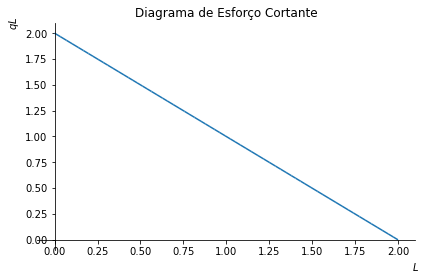

In [13]:
sp.plot((M.diff(x)).subs(L,1).subs(q,1), (x,0,2), xlabel="$L$", ylabel="$qL$", title="Diagrama de Esforço Cortante")

## Diagrama de momento Fletor

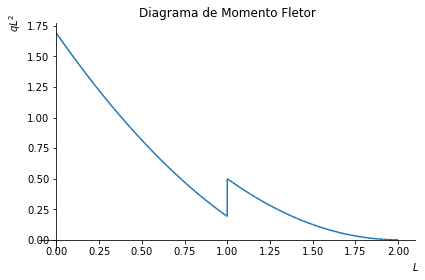

In [14]:
sp.plot(-M.subs(L,1).subs(q,1), (x,0,2), xlabel="$L$", ylabel="$qL^{2}$", title="Diagrama de Momento Fletor")